**GRADED CHALLANGE 1**

**i. PERKENALAN**

Nama saya Alfin Aditya Pangestu phase 0 batch. tugas kali ini mengolah data dari *bigquery-public-data* pada Google Cloud Big Query. Tabel yang digunakan *Summary* pada database *covid19-jhu_csse_eu* 

dari data ini saya ingin temukan tahun teratas dan tahun terbawah masing-masing dengan masing masing negara dengan angka aktif yang tinggi. Lalu di bandingkan masing-masing negara. lalu di bandingkan dengan kematian, aktif, dan sembuh.

**ii.IMPORT LIBRARY YANG DI GUNAKAN YAITU PANDAS DAN NUMPY** 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**iii. Data Loading** 

In [45]:
df = pd.read_csv('/content/drive/MyDrive/bq-results-20230605-134319-1685972617988/h8dsft_P0GC1_AlfinAdityaPangestu.csv')

DATA YANG SUDAH DILOAD KE GOOGLE COLLABS SUDAH DIPILIH DENGAN QUERY BERIKU

*SELECT province_state,	country_region, date, 	confirmed, 	deaths,	recovered, 	active, combined_key
FROM `bigquery-public-data.covid19_jhu_csse.summary`*


Melihat data keseluruhan

In [46]:
df

,province_state,country_region,date,confirmed,deaths,recovered,active,combined_key
0,Kansas,US,2020-05-15,3.0,0.0,0.0,3.0,"Chase, Kansas, US"
1,Tennessee,US,2020-05-15,88.0,0.0,0.0,88.0,"Cheatham, Tennessee, US"
2,Georgia,US,2020-05-15,695.0,23.0,0.0,672.0,"Cherokee, Georgia, US"
3,Nebraska,US,2020-05-15,1.0,0.0,0.0,1.0,"Cherry, Nebraska, US"
4,Nebraska,US,2020-05-15,8.0,0.0,0.0,8.0,"Cheyenne, Nebraska, US"
...,...,...,...,...,...,...,...,...
4264075,Wisconsin,US,2022-09-29,14559.0,155.0,NaN,NaN,"Grant, Wisconsin, US"
4264076,Wisconsin,US,2022-09-29,51964.0,668.0,NaN,NaN,"Kenosha, Wisconsin, US"
4264077,Wisconsin,US,2022-09-29,10040.0,144.0,NaN,NaN,"Oneida, Wisconsin, US"
4264078,Wisconsin,US,2022-09-29,61074.0,424.0,NaN,NaN,"Outagamie, Wisconsin, US"


Melihat data teratas

In [47]:
df.head()

,province_state,country_region,date,confirmed,deaths,recovered,active,combined_key
0,Kansas,US,2020-05-15,3.0,0.0,0.0,3.0,"Chase, Kansas, US"
1,Tennessee,US,2020-05-15,88.0,0.0,0.0,88.0,"Cheatham, Tennessee, US"
2,Georgia,US,2020-05-15,695.0,23.0,0.0,672.0,"Cherokee, Georgia, US"
3,Nebraska,US,2020-05-15,1.0,0.0,0.0,1.0,"Cherry, Nebraska, US"
4,Nebraska,US,2020-05-15,8.0,0.0,0.0,8.0,"Cheyenne, Nebraska, US"


Melihat data terbawah

In [48]:
df.tail()

,province_state,country_region,date,confirmed,deaths,recovered,active,combined_key
4264075,Wisconsin,US,2022-09-29,14559.0,155.0,NaN,NaN,"Grant, Wisconsin, US"
4264076,Wisconsin,US,2022-09-29,51964.0,668.0,NaN,NaN,"Kenosha, Wisconsin, US"
4264077,Wisconsin,US,2022-09-29,10040.0,144.0,NaN,NaN,"Oneida, Wisconsin, US"
4264078,Wisconsin,US,2022-09-29,61074.0,424.0,NaN,NaN,"Outagamie, Wisconsin, US"
4264079,Wisconsin,US,2022-09-29,65770.0,717.0,NaN,NaN,"Racine, Wisconsin, US"


**iv.DATA CLEANING**

bagian ini menghapus beberapa kolom untuk membantu kami fokus pada data yang diinginkan sesuai tujuan yang diinginkan.
maka dari itu kami menghapus:

combined_key

In [58]:
del(df["combined_key"])


In [59]:
df

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Kansas,US,2020-05-15,3.0,0.0,0.0,3.0
1,Tennessee,US,2020-05-15,88.0,0.0,0.0,88.0
2,Georgia,US,2020-05-15,695.0,23.0,0.0,672.0
3,Nebraska,US,2020-05-15,1.0,0.0,0.0,1.0
4,Nebraska,US,2020-05-15,8.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...
4264075,Wisconsin,US,2022-09-29,14559.0,155.0,NaN,NaN
4264076,Wisconsin,US,2022-09-29,51964.0,668.0,NaN,NaN
4264077,Wisconsin,US,2022-09-29,10040.0,144.0,NaN,NaN
4264078,Wisconsin,US,2022-09-29,61074.0,424.0,NaN,NaN


In [60]:
ganti = df.rename(
    columns = {"province_state": "Negara", 
               "country_region":"Kota_Asal",
               "date": "tanggal",
               "confirmed":"Terkonfirmasi",
               "deaths":"Meninggal",
               "recovered":"Sembuh",
               "active":"Aktiv"}
)

ganti

,Negara,Kota_Asal,tanggal,Terkonfirmasi,Meninggal,Sembuh,Aktiv
0,Kansas,US,2020-05-15,3.0,0.0,0.0,3.0
1,Tennessee,US,2020-05-15,88.0,0.0,0.0,88.0
2,Georgia,US,2020-05-15,695.0,23.0,0.0,672.0
3,Nebraska,US,2020-05-15,1.0,0.0,0.0,1.0
4,Nebraska,US,2020-05-15,8.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...
4264075,Wisconsin,US,2022-09-29,14559.0,155.0,NaN,NaN
4264076,Wisconsin,US,2022-09-29,51964.0,668.0,NaN,NaN
4264077,Wisconsin,US,2022-09-29,10040.0,144.0,NaN,NaN
4264078,Wisconsin,US,2022-09-29,61074.0,424.0,NaN,NaN


Tabel diatas masih terlihat beberapa nilai "NaN" di kolom *sembuh* dan *aktiv* 

In [61]:
ganti.isnull().sum()

Negara            191891
Kota_Asal              1
tanggal                0
Terkonfirmasi         19
Meninggal            442
Sembuh           2828489
Aktiv            2836568
dtype: int64

dari nilai null yang masih banyak, kita melakukan penghapusan.

In [62]:
ganti = ganti.dropna()
ganti

,Negara,Kota_Asal,tanggal,Terkonfirmasi,Meninggal,Sembuh,Aktiv
0,Kansas,US,2020-05-15,3.0,0.0,0.0,3.0
1,Tennessee,US,2020-05-15,88.0,0.0,0.0,88.0
2,Georgia,US,2020-05-15,695.0,23.0,0.0,672.0
3,Nebraska,US,2020-05-15,1.0,0.0,0.0,1.0
4,Nebraska,US,2020-05-15,8.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...
4262323,Anguilla,United Kingdom,2021-03-06,18.0,0.0,18.0,0.0
4262324,British Virgin Islands,United Kingdom,2021-03-06,153.0,1.0,131.0,21.0
4262325,Channel Islands,United Kingdom,2021-03-06,4041.0,86.0,3948.0,7.0
4262326,England,United Kingdom,2021-03-06,3689842.0,109541.0,0.0,3580301.0


konfirmasi apa masih ada "NaN" 

In [54]:
ganti.isnull().sum()

Negara           0
Kota_Asal        0
tanggal          0
Terkonfirmasi    0
Meninggal        0
Sembuh           0
Aktiv            0
combined_key     0
dtype: int64

In [63]:
ganti

,Negara,Kota_Asal,tanggal,Terkonfirmasi,Meninggal,Sembuh,Aktiv
0,Kansas,US,2020-05-15,3.0,0.0,0.0,3.0
1,Tennessee,US,2020-05-15,88.0,0.0,0.0,88.0
2,Georgia,US,2020-05-15,695.0,23.0,0.0,672.0
3,Nebraska,US,2020-05-15,1.0,0.0,0.0,1.0
4,Nebraska,US,2020-05-15,8.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...
4262323,Anguilla,United Kingdom,2021-03-06,18.0,0.0,18.0,0.0
4262324,British Virgin Islands,United Kingdom,2021-03-06,153.0,1.0,131.0,21.0
4262325,Channel Islands,United Kingdom,2021-03-06,4041.0,86.0,3948.0,7.0
4262326,England,United Kingdom,2021-03-06,3689842.0,109541.0,0.0,3580301.0


daftar baris dan kolom sudah berkurang menjadi 1341552 dan 7 kolom. tabel ready

**V. EXPLORASI DATA**
Q1. MENAMPILKAN 3 NEGARA TERATAS DAN 3 NEGARA TERBAWAH DENGAN JUMLAH TOTAL KASUS TERKONFIRMASI TERTINGGI DAN TERENDAH

In [68]:
Q1 = ganti.groupby("Kota_Asal", sort=False)["Terkonfirmasi"].sum()
Q1

Kota_Asal
US                3.392212e+09
Italy             9.139748e+08
United Kingdom    1.108171e+09
China             4.709463e+07
Germany           7.679248e+08
Spain             9.049863e+08
Netherlands       3.482127e+08
Canada            2.886679e+08
Denmark           2.616540e+05
Australia         1.140017e+07
Belgium           2.278692e+08
Brazil            3.888488e+09
Chile             3.347376e+08
Colombia          7.974275e+08
France            2.795144e+07
India             5.252970e+09
Japan             1.434237e+08
Mexico            6.320546e+08
Pakistan          2.282272e+08
Peru              4.958274e+08
Russia            1.293006e+09
Sweden            2.137413e+08
Ukraine           4.647043e+08
New Zealand       5.000000e+01
Malaysia          2.142924e+06
Cruise Ship       1.424000e+03
Name: Terkonfirmasi, dtype: float64

In [69]:
sort_data = sorted(Q1.items(), key=lambda x: x[1], reverse=True)
sort_data

[('India', 5252970126.0),
 ('Brazil', 3888487639.0),
 ('US', 3392211539.0),
 ('Russia', 1293005829.0),
 ('United Kingdom', 1108171133.0),
 ('Italy', 913974765.0),
 ('Spain', 904986309.0),
 ('Colombia', 797427547.0),
 ('Germany', 767924830.0),
 ('Mexico', 632054550.0),
 ('Peru', 495827356.0),
 ('Ukraine', 464704283.0),
 ('Netherlands', 348212695.0),
 ('Chile', 334737574.0),
 ('Canada', 288667943.0),
 ('Pakistan', 228227223.0),
 ('Belgium', 227869193.0),
 ('Sweden', 213741339.0),
 ('Japan', 143423686.0),
 ('China', 47094627.0),
 ('France', 27951442.0),
 ('Australia', 11400166.0),
 ('Malaysia', 2142924.0),
 ('Denmark', 261654.0),
 ('Cruise Ship', 1424.0),
 ('New Zealand', 50.0)]

dari datra diatas kita dapat melihat 3 negara teratas yang terkonfirmasi pada 'India', 'Brazil', 'US' dan terkonfimasi terendah 'Malaysia','Denmark', 'New Zealand'

Q2. BANDINGKAN TOTAL KEMATIAN PADA NEGARA TERKONFIMASI TERTINGGI DAN TERENDAH MASING-MASING PADA TAHUN 2020,2021,2022 

In [74]:
l = ganti.groupby("tanggal")
l.first()

,Negara,Kota_Asal,Terkonfirmasi,Meninggal,Sembuh,Aktiv
tanggal,,,,,,
2020-03-22,New York,US,1873.0,0.0,0.0,0.0
2020-03-23,Kentucky,US,0.0,0.0,0.0,0.0
2020-03-24,Ohio,US,0.0,0.0,0.0,0.0
2020-03-25,Wisconsin,US,0.0,0.0,0.0,0.0
2020-03-26,South Carolina,US,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-08-04,Limburg,Belgium,63873.0,0.0,0.0,63873.0
2021-09-22,Melaka,Malaysia,55728.0,50756.0,824.0,0.0
2022-02-14,Guernsey,United Kingdom,12599.0,31.0,0.0,0.0


Tanggal awal 22 maret 2020 dan tanggal akhir 20 september 2022. 

Menampilkan data kematian pada negara teratas  dan terendah pada tahun 2020,2021,2022
kita mulai pada tahun 2020:

In [75]:
Q2020 = ganti[ganti["tanggal"] < "2021-01-01"]
Q2020

,Negara,Kota_Asal,tanggal,Terkonfirmasi,Meninggal,Sembuh,Aktiv
0,Kansas,US,2020-05-15,3.0,0.0,0.0,3.0
1,Tennessee,US,2020-05-15,88.0,0.0,0.0,88.0
2,Georgia,US,2020-05-15,695.0,23.0,0.0,672.0
3,Nebraska,US,2020-05-15,1.0,0.0,0.0,1.0
4,Nebraska,US,2020-05-15,8.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...
4258352,Unknown,Spain,2020-06-08,0.0,0.0,0.0,0.0
4258353,Vasternorrland,Sweden,2020-06-08,887.0,90.0,0.0,797.0
4258354,Vastra Gotaland,Sweden,2020-06-08,8128.0,602.0,0.0,7526.0
4258355,Vinnytsia Oblast,Ukraine,2020-06-08,1150.0,19.0,728.0,403.0


In [76]:
Q2020["Kota_Asal"].value_counts()

US                895670
Russia             17762
Japan              10604
China               9405
India               7537
Colombia            7349
Mexico              7282
Brazil              6121
Ukraine             5778
Peru                5668
Italy               4872
Spain               4612
Sweden              4410
Germany             3944
Canada              3909
United Kingdom      3839
Chile               3728
Netherlands         3313
France              2836
Australia           2281
Pakistan            1435
Belgium              600
Denmark              570
Cruise Ship            2
Name: Kota_Asal, dtype: int64

Pada tahun 2020 Negara tertinggi terkonfirmasi yaitu 'US'
Negara terendah terkonfirmasi yaitu 'Denmark' 

In [78]:
Q2021 = ganti[ganti["tanggal"] > "2020-12-31"]
Q2021

,Negara,Kota_Asal,tanggal,Terkonfirmasi,Meninggal,Sembuh,Aktiv
2122,Northern Territory,Australia,2021-05-26,172.0,0.0,169.0,3.0
2124,Limburg,Belgium,2021-05-26,59210.0,0.0,0.0,59210.0
2125,Unknown,Belgium,2021-05-26,20054.0,24889.0,0.0,-4835.0
2126,Distrito Federal,Brazil,2021-05-26,400977.0,8537.0,378885.0,13555.0
2127,Minas Gerais,Brazil,2021-05-26,1536112.0,39540.0,1414213.0,82359.0
...,...,...,...,...,...,...,...
4262323,Anguilla,United Kingdom,2021-03-06,18.0,0.0,18.0,0.0
4262324,British Virgin Islands,United Kingdom,2021-03-06,153.0,1.0,131.0,21.0
4262325,Channel Islands,United Kingdom,2021-03-06,4041.0,86.0,3948.0,7.0
4262326,England,United Kingdom,2021-03-06,3689842.0,109541.0,0.0,3580301.0


In [79]:
Q2021["Kota_Asal"].value_counts()

US                212863
Russia             17928
Japan              10576
India               7992
Colombia            7317
China               7282
Mexico              7128
Ukraine             5833
Brazil              5832
Peru                5616
Sweden              4536
Italy               4536
Spain               4320
Germany             3672
Netherlands         3672
Chile               3579
United Kingdom      3404
Canada              3240
Belgium             2592
France              2374
Australia           1722
Pakistan            1512
Denmark              432
New Zealand           50
Malaysia              17
Name: Kota_Asal, dtype: int64

Pada tahun 2021 Negara tertinggi terkonfirmasi yaitu 'US' Negara terendah terkonfirmasi yaitu 'Malaysia' 

In [80]:
Q2022 = ganti[ganti["tanggal"] > "2021-12-31"]
Q2022

,Negara,Kota_Asal,tanggal,Terkonfirmasi,Meninggal,Sembuh,Aktiv
105576,Guernsey,United Kingdom,2022-02-14,12599.0,31.0,0.0,0.0
425639,Pitcairn Islands,United Kingdom,2022-09-20,4.0,0.0,0.0,0.0
569900,Jersey,United Kingdom,2022-02-14,34367.0,106.0,0.0,0.0
4038253,Unknown,Ukraine,2022-07-11,247991.0,3937.0,0.0,0.0


In [81]:
Q2022["Kota_Asal"].value_counts()

United Kingdom    3
Ukraine           1
Name: Kota_Asal, dtype: int64

Demikian kita dapat menyimpulkan bahwa tiap tahun belakangan ini tingkat terkonfirmasi menurun drastis

In [83]:
all = ganti.groupby('Kota_Asal').sum()
all

<ipython-input-83-e5758b4b3cb0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all = ganti.groupby('Kota_Asal').sum()


,Terkonfirmasi,Meninggal,Sembuh,Aktiv
Kota_Asal,,,,
Australia,1.140017e+07,323804.0,9.308653e+06,1.767698e+06
Belgium,2.278692e+08,5904502.0,0.000000e+00,2.219700e+08
Brazil,3.888488e+09,106981806.0,3.410800e+09,3.707073e+08
Canada,2.886679e+08,7385240.0,2.642481e+08,1.727535e+07
Chile,3.347376e+08,7897825.0,3.157848e+08,1.108825e+07
China,4.709463e+07,2347068.0,4.430510e+07,4.422210e+05
Colombia,7.974275e+08,21107467.0,7.339135e+08,3.385045e+07
Cruise Ship,1.424000e+03,16.0,1.134000e+03,2.740000e+02
Denmark,2.616540e+05,216.0,2.487240e+05,1.271400e+04


In [88]:
konfirmasii = all["Terkonfirmasi"].sum(axis=0)
konfirmasii

21785477846.0

In [89]:
pulih = all["Sembuh"].sum(axis=0)
pulih

14472807779.0

In [90]:
positive = all["Aktiv"].sum(axis=0)
positive

6773254623.0

In [91]:
kematian = all["Meninggal"].sum(axis=0)
kematian

549978388.0

Selama 3 tahun terkena pandemi covid jumlah kasus terkonfirmasi sebanyak 21.785.477.846 sedangkan pulih dengan jumlah 14.472.807.779 data kematian mencapai 549.978.388 sedangkan yang terkonfirmasih aktiv sebanyak 6.773.254.623

**KESIMPULAN**

In [92]:
ganti.describe()

,Terkonfirmasi,Meninggal,Sembuh,Aktiv
count,1.341552e+06,1.341552e+06,1.341552e+06,1.341552e+06
mean,1.623901e+04,4.099568e+02,1.078811e+04,5.048820e+03
std,1.165994e+05,2.992416e+03,1.054505e+05,7.473435e+04
min,-3.028440e+05,-1.780000e+02,-8.544050e+05,-6.298082e+06
25%,7.700000e+01,1.000000e+00,0.000000e+00,5.200000e+01
50%,5.740000e+02,1.000000e+01,0.000000e+00,4.440000e+02
75%,3.107000e+03,5.800000e+01,0.000000e+00,2.057000e+03
max,6.327194e+06,6.246410e+05,6.399531e+06,1.087776e+07


Secara umum kita dapat melihat bahwa rata-rata total kasus terkonfirmasi dari dataset yang diberikan adalah 1.341.552

In [94]:
tertinggi = {"Kota_Asal": ["India","Brazil", "US"],
     "Total Terkofirmasi": [5252970000.0,3888488000.0,3392212000.0 ]}

tertinggi = pd.DataFrame.from_dict(tertinggi)



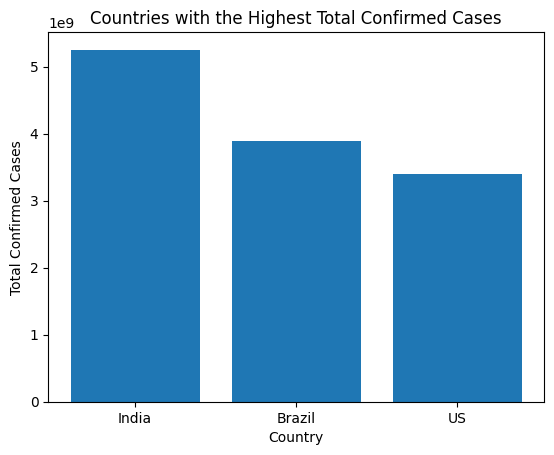

In [95]:
x = tertinggi["Kota_Asal"]
y = tertinggi["Total Terkofirmasi"]
 
# Plotting the data
plt.bar(x, y)
 
# Adding title to the plot
plt.title("Countries with the Highest Total Confirmed Cases")
 
# Adding label on the y-axis
plt.ylabel("Total Confirmed Cases")
 
# Adding label on the x-axis
plt.xlabel("Country")
 
plt.show()

In [97]:
terendah = {"Kota_Asal": ["Malaysia","Denmark", "New Zealand"],
     "Total Terkonfirmasi": [2142924.0, 261654.0,50.0]}

terendah = pd.DataFrame.from_dict(terendah)

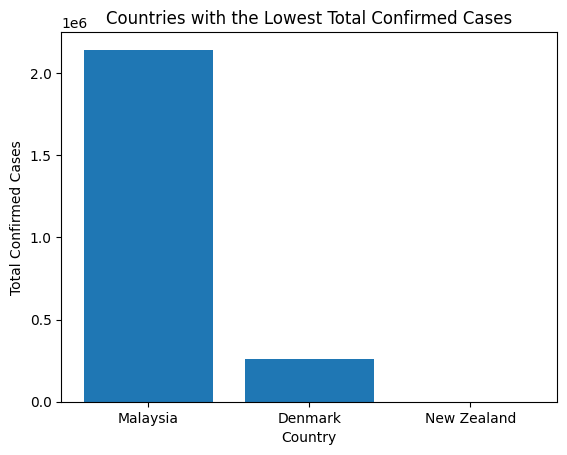

In [99]:
# Initializing the data
x = terendah["Kota_Asal"]
y = terendah["Total Terkonfirmasi"]
 
# Plotting the data
plt.bar(x, y)
 
# Adding title to the plot
plt.title("Countries with the Lowest Total Confirmed Cases")
 
# Adding label on the y-axis
plt.ylabel("Total Confirmed Cases")
 
# Adding label on the x-axis
plt.xlabel("Country")
 
plt.show()

kita dapat melihat jumlah total kematian dan rata-rata jumlah kematian tiap negara.

In [101]:
agg_functions = {
    'Meninggal':
    ['sum', 'mean']
}
  
ganti.groupby(['Kota_Asal']).agg(agg_functions)

Meninggal               
                        sum           mean
Kota_Asal                                 
Australia          323804.0      80.890332
Belgium           5904502.0    1849.781328
Brazil          106981806.0    8950.205471
Canada            7385240.0    1033.045181
Chile             7897825.0    1080.857397
China             2347068.0     140.652484
Colombia         21107467.0    1439.210896
Cruise Ship            16.0       8.000000
Denmark               216.0       0.215569
France             229807.0      44.108829
Germany          19226843.0    2524.532957
India            70628267.0    4548.152940
Italy            33390371.0    3549.146577
Japan             2525011.0     119.216761
Malaysia          1917085.0  112769.705882
Mexico           58571766.0    4064.661069
Netherlands       4823511.0     690.552756
New Zealand             0.0       0.000000
Pakistan          4983768.0    1691.132677
Peru             25629642.0    2271.325948
Russia           27392282.0     767.505800
Spain            23541078.0    2635.588670
Sweden            4145821.0     463.427342
US               75222733.0      67.857910
Ukraine           9864990.0     849.624494
United Kingdom   35937469.0    4961.682866

Kita dapat melihat tidak ada kematian terkonfirmasi pada new zealand dan kematian tertinggi ada di india

Text(0.5, 1.0, 'Total Recovered Cases, Active Cases, and Deaths Respectively')

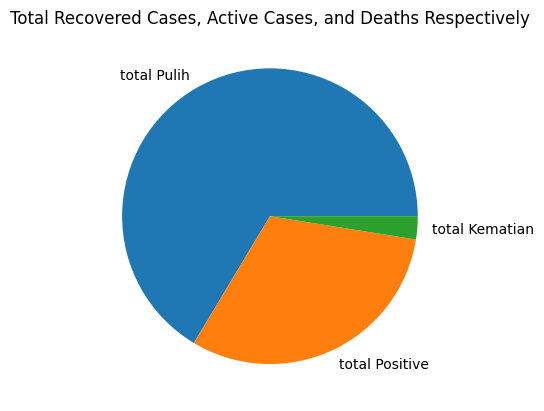

In [104]:
# initializing the data
totals = ["total Pulih", "total Positive", "total Kematian"]
data = [14472807779.0, 6773254623.0, 549978388.0]
 
# plotting the data
plt.pie(data, labels=totals)
 
# Adding title to the plot
plt.title("Total Recovered Cases, Active Cases, and Deaths Respectively")

Secara keseluruhan, kita dapat melihat bahwa meskipun jumlah total kasus terkonfirmasi dan kematian yang tinggi, jumlah total kasus yang pulih tampaknya berakhir dengan catatan yang lebih positif